# ShopAssist AI


#### Project Background

In today's digital age, online shopping has become the go-to option for many consumers. However, the overwhelming number of choices and the lack of personalized assistance can make the shopping experience daunting. To address this, we have developed **ShopAssist AI, a chatbot that combines the power of large language models and rule-based functions to ensure accurate and reliable information delivery**.


#### Problem Statement

*Given a dataset containing information about laptops (product names, specifications, descriptions, etc.), build a chatbot that parses the dataset and provides accurate laptop recommendations based on user requirements*.


You can load the data and see it here.

## Part 1: Install & Setup

In [1]:
# Install OpenAI library
!pip install -U -q openai tenacity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.3/389.3 kB 5.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
#os.chdir('/content/drive/MyDrive/GenAI Revamp - 2024/ShopAssist')
os.chdir("/content/drive/MyDrive/Colab Notebooks/13. OpenAI/ShopAssist2.0")
!ls

 app.py				       OPENAI_API_User_Key.txt
 functions.py			      'Shop Assist AI_20_Reference.ipynb'
 Intro_to_function_calling_SKH.ipynb   ShopAssistAI_Submission_Notebook.ipynb
 laptop_data.csv		       updated_laptop_v2.csv


In [4]:
# Import the libraries
import pandas as pd
from IPython.display import display, HTML
# Set the display width to control the output width
pd.set_option('display.width', 100)
# Read the dataset and read the Laptop Dataset
df = pd.read_csv('laptop_data.csv')
df

,Brand,Model Name,Core,CPU Manufacturer,Clock Speed,RAM Size,Storage Type,Display Type,Display Size,Graphics Processor,Screen Resolution,OS,Laptop Weight,Special Features,Warranty,Average Battery Life,Price,Description
0,Dell,Inspiron,i5,Intel,2.4 GHz,8GB,SSD,LCD,"15.6""",Intel UHD,1920x1080,Windows 10,2.5 kg,Backlit Keyboard,1 year,6 hours,"35,000",The Dell Inspiron is a versatile laptop that c...
1,MSI,GL65,i7,Intel,2.6 GHz,16GB,HDD+SSD,IPS,"15.6""",NVIDIA GTX,1920x1080,Windows 10,2.3 kg,RGB Keyboard,2 years,4 hours,"55,000",The MSI GL65 is a high-performance laptop desi...
2,HP,EliteBook,i7,Intel,2.8 GHz,16GB,SSD,LED,"14""",Intel UHD,1920x1080,Windows 11,1.5 kg,Fingerprint Sensor,3 years,8 hours,"90,000",The HP EliteBook is a premium laptop designed ...
3,Lenovo,IdeaPad,i3,Intel,2.1 GHz,8GB,HDD,TN,"15.6""",Intel UHD,1366x768,Windows 10,2.2 kg,Dolby Audio,1 year,5 hours,"25,000",The Lenovo IdeaPad is a versatile laptop that ...
4,ASUS,ZenBook Pro,i9,Intel,3.1 GHz,64GB,SSD,OLED,"15.6""",NVIDIA RTX,3840x2160,Windows 10,1.8 kg,NanoEdge Display,2 years,7 hours,"200,000",The ASUS ZenBook Pro is a high-end laptop that...
5,Acer,Predator,i7,Intel,2.8 GHz,16GB,SSD,IPS,"17.3""",NVIDIA GTX,1920x1080,Windows 10,3.2 kg,Dual Cooling Fans,1 year,5 hours,"80,000",The Acer Predator is a powerhouse laptop desig...
6,Microsoft,Surface Laptop,i5,Intel,1.6 GHz,8GB,SSD,PixelSense,"13.5""",Intel Iris Plus,2256x1504,Windows 11,1.3 kg,Touchscreen Display,1 year,10 hours,"90,000",The Microsoft Surface Laptop is a premium devi...
7,Lenovo,ThinkPad,Ryzen 7,AMD,3.0 GHz,16GB,SSD,IPS,"14""",NVIDIA GTX,2560x1440,Linux,1.6 kg,Backlit Keyboard,3 years,6 hours,"60,000",The Lenovo ThinkPad is a powerful laptop desig...
8,HP,Pavilion,i5,Intel,2.3 GHz,12GB,HDD,LCD,"15.6""",Intel UHD,1366x768,Windows 10,2.1 kg,B&O Audio,1 year,4 hours,"30,000",The HP Pavilion is a budget-friendly laptop th...
9,ASUS,ROG Strix G,i7,Intel,2.9 GHz,16GB,SSD,IPS,"17.3""",NVIDIA RTX,1920x1080,Windows 10,2.9 kg,Aura Sync RGB Keyboard,2 years,5 hours,"85,000",The ASUS ROG Strix G is a high-performance gam...


In [5]:
gpt_model = "gpt-4o-mini-2024-07-18"#"gpt-3.5-turbo" #
#"gpt-3.5-turbo"
# "gpt-4o-mini"
# gpt-4o-mini-2024-07-18

#### Approach:

1. **Conversation and Information Gathering**: The chatbot will utilize language models to understand and generate natural responses. Through a conversational flow, it will ask relevant questions to gather information about the user's requirements.
2. **Information Extraction**: Once the essential information is collected, rule-based functions come into play, extracting top 3 laptops that best matches the user's needs.
3. **Personalized Recommendation**: Leveraging this extracted information, the chatbot engages in further dialogue with the user, efficiently addressing their queries and aiding them in finding the perfect laptop solution.

## Part 2: System Design


#### Dataset

We have a dataset `laptop.csv` where  each row describes the features of a single laptop and also has a small description at the end. The chatbot that we build will leverage LLMs to parse this `Description` column and provide recommendations

As you could see in the output above, the chatbot should ask a series of questions to
- Determine the user's requirments. For simplicity, we have used 6 features to encapsulate the user's needs. The 6 features are as follows:
    - GPU intensity
    - Display quality
    - Portability
    - Multitasking
    - Processing speed
    - Budget

- Confirm if the user's requirements have been correctly captured at the end.

After that the chatbot lists down the top 3 products that are the most relevant, and engages in further conversation to help the user find the best one.


#### Building the Chatbot

Now let's go ahead and understand the system design for the chatbot.

![Chatbot_sys_design.png](https://drive.google.com/uc?id=1j-mw_dNcbxGcelQ0PmkDB0nKOpauU1wX)

|`Stage 1`

- Intent Clarity Layer
- Intent Confirmation Layer

`Stage 2`

- Product Mapping Layer
- Product Information Extraction Layer

`Stage 3`

- Product Recommendation Layer

##### Major functions behind the Chatbot

Let's now look at a brief overview of the major functions that form the chatbot. We'll take a deep dive later



- `initialize_conversation()`: This initializes the variable conversation with the system message.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant
- `moderation_check()`: This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, it ends the conversation.
- `intent_confirmation_layer()`: This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not GPU intensity, Display quality, Portability, Multitasking, Processing speed, Budget
- `dictionary_present()`: This function checks if the final understanding of user's profile is returned by the chatbot as a python dictionary or not. If there is a dictionary, it extracts the information as a Python dictionary.
- `compare_laptops_with_user()`: This function compares the user's profile with the different laptops and come back with the top 3 recommendations.
- `initialize_conv_reco()`: Initializes the recommendations conversation

In the next sections, we will look at how to write the code for the above functions.

## Part 3: Implementation

## Stage 1

[Stage 1 Flowchart](https://cdn.upgrad.com/uploads/production/ed8cf454-0c7c-4c5d-bc05-23bb3cea6c57/image+3.jpg)

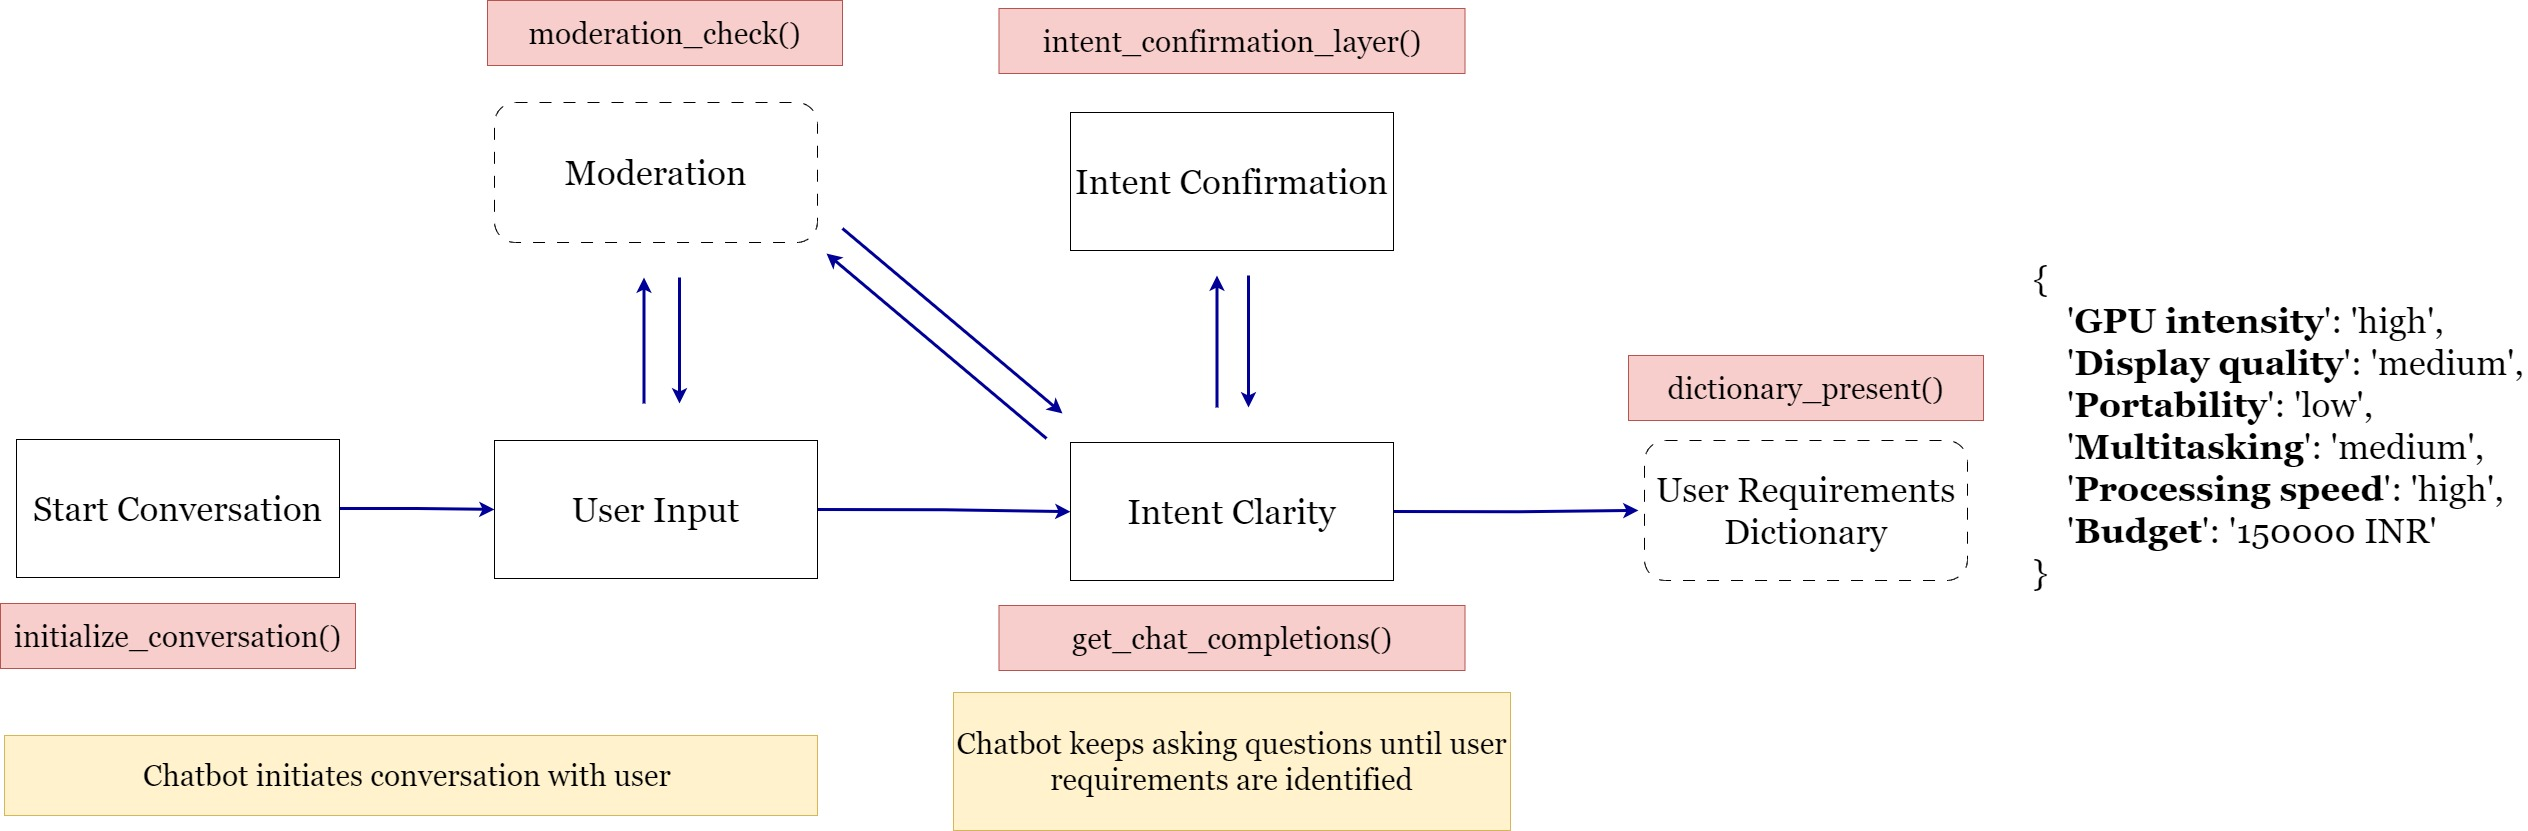

### 3.1 - Import the libraries

Let's start by importing the libraries that we'll require for this project. Following are the ones:
- openai
- pandas
- os, json, ast

Make sure the api key is stored in the text file `OPENAI_API_Key.txt`.

In [6]:
# Import the libraries
import os, json, ast
import openai
from tenacity import retry, wait_random_exponential, stop_after_attempt

In [7]:
# Read the OpenAI API key
openai.api_key = open("OPENAI_API_User_Key.txt", "r").read().strip()
os.environ['OPENAI_API_KEY'] = openai.api_key

In [8]:
# # Recall that messages to the LLM is a list of dicts containing system_message, user_input and assistant_message
# conversation = [{"role": "system", "content": system_message},
#                 {"role": "user", "content": user_input},
#                 {"role": "assistant", "content": assistant_message}]

### 3.2 - Implementing Intent Clarity and Intent Confirmation Layers

Let's start with the first part of the implementation - building the `intent clarity` and `intent confirmation` layers. As mentioned earlier, this layer helps in identifying the user requirements and passing it on to the product matching layer. Here are the functions that we would be using for building these layers:

- `initialize_conversation()`


### `initialize_conversation()`:
This initializes the variable conversation with the system message. Using prompt engineering and chain of thought reasoning, the function will enable the chatbot to keep asking questions until the user requirements have been captured in a dictionary. It also includes Few Shot Prompting(sample conversation between the user and assistant) to align the model about user and assistant responses at each step.



```
def initialize_conversation():
    '''
    Initializes a conversation for an intelligent laptop gadget expert system.

    Returns:
        list: [{"role": "system", "content": system_message}]
        A list containing a dictionary representing the system's initial message.
        
    The function initializes a conversation with the user, providing instructions, examples,
    and a sample conversation to guide the user in interacting with the system. The system's
    initial message includes information about the purpose of the conversation, instructions
    for filling in user profile details, guidelines for asking questions, and a sample
    conversation demonstrating how the interaction with the system progresses.

    The system expects the user to provide information related to their laptop requirements,
    including GPU intensity, display quality, portability, multitasking needs, processing
    speed, and budget. The provided information is used to update a predefined dictionary
    representing the user's profile. The system emphasizes extracting specific details from
    the user's responses to accurately fill in the dictionary values.

    The conversation flow involves three main thoughts:
    - Thought 1: Understanding the user's profile and filling confident values.
    - Thought 2: Filling values for remaining keys based on gathered information.
    - Thought 3: Confirming and verifying updated dictionary values.

    Users are encouraged to engage in a meaningful conversation with the system to ensure
    accurate profile representation and tailored recommendations for the best laptop choice.

    Usage:
        # Initialise the conversation
        conversation = initialize_conversation()
        # Print the conversation
        print(conversation)
    '''
    ```



#### Implementation for  `initialize_conversation()`:

In [64]:
def initialize_conversation():
    '''
    Returns a list [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"

    example_user_dict = {'GPU intensity': "high",
                        'Display quality':"high",
                        'Portability': "low",
                        'Multitasking': "high",
                        'Processing speed': "high",
                        'Budget': "150000"}

    example_user_req = {'GPU intensity': "_",
                        'Display quality': "_",
                        'Portability': "_",
                        'Multitasking': "_",
                        'Processing speed': "_",
                        'Budget': "_"}

    system_message = f"""
    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {{'GPU intensity': 'values','Display quality': 'values','Portability': 'values','Multitasking': 'values','Processing speed': 'values','Budget': 'values'}}
    The value for 'Budget' should be a numerical value extracted from the user's response.
    The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.
    {delimiter}
    Here are some instructions around the values for the different keys. If you do not follow this, you'll be heavily penalised:
    - The values for all keys, except 'Budget', should strictly be either 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    - The value for 'Budget' should be a numerical value extracted from the user's response.
    - 'Budget' value needs to be greater than or equal to 25000 INR. If the user says less than that, please mention that there are no laptops in that range.
    - Do not randomly assign values to any of the keys.
    - The values need to be inferred from the user's response.
    {delimiter}

    To fill the dictionary, you need to have the following chain of thoughts:
    Follow the chain-of-thoughts below and only output the final updated python dictionary for the keys as described in {example_user_req}. \n
    {delimiter}
    Thought 1: Ask a question to understand the user's profile and requirements. \n
    If their primary use for the laptop is unclear. Ask followup questions to understand their needs.
    You are trying to fill the values of all the keys {{'GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget'}} in the python dictionary by understanding the user requirements.
    Identify the keys for which you can fill the values confidently using the understanding. \n
    Remember the instructions around the values for the different keys.
    If the necessary information has been extracted, only then proceed to the next step. \n
    Otherwise, rephrase the question to capture their profile clearly. \n

    {delimiter}
    Thought 2: Now, you are trying to fill the values for the rest of the keys which you couldn't in the previous step.
    Remember the instructions around the values for the different keys.
    Ask questions you might have for all the keys to strengthen your understanding of the user's profile.
    If yes, move to the next Thought. If no, ask question on the keys whose values you are unsure of. \n
    It is a good practice to ask question with a sound logic as opposed to directly citing the key you want to understand value for.
    {delimiter}

    {delimiter}
    Thought 3: Check if you have correctly updated the values for the different keys in the python dictionary.
    If you are not confident about any of the values, ask clarifying questions.
    {delimiter}

    {delimiter}
    Here is a sample conversation between the user and assistant:
    User: "Hi, I am an editor."
    Assistant: "Great! As an editor, you likely require a laptop that can handle demanding tasks. Hence, the laptop should have high multitasking capability. You would also need a high end display for better visuals and editing. May I know what kind of work do you primarily focus on? Are you more involved in video editing, photo editing, or both? Understanding the specific type of editing work will help me tailor my recommendations accordingly. Let me know if my understanding is correct until now."
    User: "I primarily work with After Effects."
    Assistant: "Thank you for providing that information. Working with After Effects involves working with graphics, animations, and rendering, which will require high GPU. Do you work with high-resolution media files, such as 4K videos or RAW photos? Understanding your file sizes will help determine the storage capacity and processing power needed."
    User: "Yes, sometimes I work with 4K videos as well."
    Assistant: "Thank you for the information. Processing 4K vidoes will require a good processor and high GPU. I think we have already determined earlier that you need a high GPU. To ensure I have a complete understanding of your needs, I have one more question: Are you frequently on the go and require a laptop that is lightweight and easy to carry, or do you primarily work from a stationary location?"
    User: "Yes, sometimes I travel but do not carry my laptop."
    Assistant:"Could you kindly let me know your budget for the laptop? This will help me find options that fit within your price range while meeting the specified requirements."
    User: "my max budget is 1.5lakh inr"
    Assistant: "{example_user_dict}"
    {delimiter}

    Start with a short welcome message and encourage the user to share their requirements.
    """
    conversation = [{"role": "system", "content": system_message}]
    # conversation = system_message
    return conversation

Let's see what does `initialize_conversation()` does.

<br>

We have added a prefix `debug_` to each of the variables so that we can play around with the inputs and outputs and it doesn't disturb the main function.

#### initialize debug_conversation

In [10]:
debug_conversation = initialize_conversation()
print(debug_conversation)

[{'role': 'system', 'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as stat

In [11]:
# Let's look at the content in the debug_conversation key
print(debug_conversation[0]['content'])


    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {'GPU intensity': 'values','Display quality': 'values','Portability': 'values','Multitasking': 'values','Processing speed': 'values','Budget': 'values'}
    The value for 'Budget' should be a numerical value extracted from the user's response.
    The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.


#### initialize system_message

In [12]:
# Let's initialise conversation
system_message = initialize_conversation()
print(system_message[0]["content"])


    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {'GPU intensity': 'values','Display quality': 'values','Portability': 'values','Multitasking': 'values','Processing speed': 'values','Budget': 'values'}
    The value for 'Budget' should be a numerical value extracted from the user's response.
    The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.


Let's now look at the next function.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant. We'll use the Chat Completions function for performing LLM calls to OpenAI.

### `get_chat_completions()`:

This function perform LLM call using the Chat Completions API to get the LLM response.

In [13]:
# Define a Chat Completions API call
# Retry up to 6 times with exponential backoff, starting at 1 second and maxing out at 20 seconds delay
@retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(6))
def get_chat_completions(messages):
    response = chat_completion = openai.chat.completions.create(
            model = gpt_model,
            messages = messages,
            seed = 2345)

    return response.choices[0].message.content

#### unit testing `get_chat_completions()`:

In [14]:
# Testing the OpenAI functions defined above
input_prompt ='What is the capital of France?'
messages = [{'role':'user','content':input_prompt}]
# system_message_json_output = """<<. Return output in JSON format.>>"""
# messages[0]['content']+=system_message_json_output
messages

[{'role': 'user', 'content': 'What is the capital of France?'}]

In [15]:
## Get LLM Outputs - normal
get_chat_completions(messages) ## Chat Completions API

'The capital of France is Paris.'

### `moderation_check()`:
 This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, you can add a break statement to end the conversation.

In [16]:
# Define a function called moderation_check that takes user_input as a parameter.

def moderation_check(user_input):
    # Call the OpenAI API to perform moderation on the user's input.
    response = openai.moderations.create(input=user_input)

    # Extract the moderation result from the API response.
    moderation_output = response.results[0].flagged
    # Check if the input was flagged by the moderation system.
    if moderation_output == True:
        # If flagged, return "Flagged"
        return "Flagged"
    else:
        # If not flagged, return "Not Flagged"
        return "Not Flagged"

In [17]:
moderation_check("I want to kill them.")

'Flagged'

#### unit testing `moderation_check()`:

Let's test moderation on the `debug_user_input`

In [18]:
debug_moderation = moderation_check("President of USA")
print(debug_moderation)

Not Flagged


Let's now test moderation on some other text.

In [19]:
print(moderation_check("I want to kill Ravan."))
print(moderation_check("I need a laptop"))

Flagged
Not Flagged


So, this moderation api may not be perfect but if you ask this to the ChatGPT or it's API (GPT 3.5), it'll not help you with such requests. Remember, moderation should also be applied on the GPT 3.5's output.

Let's now check moderation on the assistant's response `debug_response_assistant`.

In [20]:
debug_user_input = "Hi, I am Anand. I need a laptop for coding."

In [21]:
print(moderation_check(debug_user_input))

Not Flagged


In [22]:
debug_conversation.append({"role": "user", "content": debug_user_input})
# print(debug_conversation[0]["content"]) # System Message
print(debug_conversation[1]["content"]) # User Input

Hi, I am Anand. I need a laptop for coding.


In [23]:
# Let's look at the debug_conversation list
display(debug_conversation)

[{'role': 'system',
  'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as st

In [24]:
# Getting the response from the Assistant by passing the conversation to the Chat Completions API
debug_response_assistant = get_chat_completions(debug_conversation)
display(debug_response_assistant)

'Hello Anand! Great to hear that you need a laptop for coding. Coding can vary in requirements depending on the type of development you do, such as web development, software development, or perhaps data science. Could you tell me more about the specific type of coding you focus on and whether you work with resource-intensive applications? Additionally, do you often work on the go, or do you have a stationary workstation? This will help me assess your needs better.'

In [25]:
# Let's append this to the conversation list
debug_conversation.append(({"role": "system", "content": debug_response_assistant}))
debug_conversation

[{'role': 'system',
  'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as st

In [26]:
print(moderation_check(debug_response_assistant))

Not Flagged


As mentioned earlier, you need to understand the user's profile, which essentially means that all the features: GPU intensity, Display quality, Portability, Multitasking, Processing speed, Budget are captured or not. Let's look at the function that helps us verify that.

### `intent_confirmation_layer()`:

This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not
   - GPU intensity
   - Display quality
   - Portability
   - Multitasking
   - Processing speed
   - Budget



```
def intent_confirmation_layer(response_assistant):
    """
    This function serves as an intent confirmation layer for a laptop recommendation system using OpenAI LLM API.

    Parameters:
    - response_assistant (str): The input text containing user requirements captured through 6 keys:
        'GPU intensity', 'Display quality', 'Portability', 'Multitasking', 'Processing speed', and 'Budget'.

    Returns:
    - str: A one-word string in JSON format indicating if the values for the specified keys are correctly filled.
        - 'Yes' if the values are correctly filled for all keys ('GPU intensity', 'Display quality', 'Portability',
          'Multitasking', 'Processing speed') based on the importance as stated by the user.
        - 'No' otherwise.

    Note:
    - The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on their importance as stated by the user.
    - The input text should be structured such that it contains the necessary keys and their corresponding values.
    - The function uses OpenAI's Chat Completion API to evaluate the correctness of the input values.
    """
```



In [27]:
def intent_confirmation_layer(response_assistant, json_output = True):
    delimiter = "####"
    prompt = f"""
    You are a senior evaluator who has an eye for detail.
    You are provided an string input. You need to see that in the string the values for following
    1. GPU intensity
    2. Display Quality
    3. Portability
    4. Multitasking
    5. Processing speed
    6. Budget
    have been captured successfully. Return Yes Or No

    The values for all keys, except 'budget', must be 'low', 'medium', or 'high' and the value of 'budget' must be a number which is a currency value.

    Please not that every key should have a value and budget should be a valid number representing a currency
    Only output a one-word string in JSON format at the key 'result' - Yes/No.
    Remember return No if any one of the values is not captured
    Thought 1 - Output a string 'Yes' if the values are correctly filled for all keys, otherwise output 'No'.
    Thought 2 - If the answer is No, mention the reason in the key 'reason'.
    THought 3 - Think carefully before the answering.

    """
    messages=[{"role": "system", "content":prompt },
              {"role": "user", "content":f"""Here is the input: {response_assistant}""" }]
    response = openai.chat.completions.create(
                                    model= gpt_model, #"gpt-3.5-turbo",
                                    messages = messages,
                                    response_format={"type": "json_object"},
                                    seed = 1234
                                    )
    if json_output == True:
      json_output = json.loads(response.choices[0].message.content)
      return json_output
    else:
      return response.choices[0].message.content


#### unit testing `intent_confirmation_layer()`:

Let's apply the function to the assistant's reponse and see if it has captured the user profile.

In [28]:
debug_response_assistant

'Hello Anand! Great to hear that you need a laptop for coding. Coding can vary in requirements depending on the type of development you do, such as web development, software development, or perhaps data science. Could you tell me more about the specific type of coding you focus on and whether you work with resource-intensive applications? Additionally, do you often work on the go, or do you have a stationary workstation? This will help me assess your needs better.'

In [29]:
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
display(debug_confirmation)

{'result': 'No',
 'reason': 'Missing values for GPU intensity, Display Quality, Portability, Multitasking, Processing speed, and Budget.'}

In [30]:
# Printing the value for better clarity
print("Result:", debug_confirmation.get('result'),"\t", "Reason:", debug_confirmation.get('reason'))

Result: No 	 Reason: Missing values for GPU intensity, Display Quality, Portability, Multitasking, Processing speed, and Budget.


Now, you can keep adding user and assistant responses to debug_conversation and get to a point where intent_confirmation_layer() gives yes as a response. Let's see if the following response by the assistant passes the intent_confirmation_layer() test.

In [31]:
#Let's add the above assistant response to the debug_conversation.
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})

In [32]:
debug_conversation

[{'role': 'system',
  'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as st

Let's say that after a series of conversations you get the following response from the assistant.

In [33]:
# Example 1 - Let's check with the confirmation_layer if all the keys are present
debug_response_assistant_1 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000 INR'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_1)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000 INR'}



Do you think it'll pass the `intent_confirmation_layer()` test?

 Let's try it out.

In [34]:
response = intent_confirmation_layer(debug_response_assistant_1)
print(type(response))
response.get('result') # Extract the result key from the dictionary

<class 'dict'>


'Yes'

In [35]:
print(response)

{'result': 'Yes'}


In [36]:
response = intent_confirmation_layer(debug_response_assistant_1, json_output = False)
print(type(response))
print(response)

<class 'str'>
{
    "result": "Yes"
}


In [37]:
# Example 2 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_2 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_2)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low'}



In [38]:
intent_confirmation_layer(debug_response_assistant_2)
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_2)

{'result': 'No', 'reason': 'Budget value is missing.'}

In [39]:
# Example 3 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_3 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_3)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}



In [40]:
intent_confirmation_layer(debug_response_assistant_3)
#iterate_llm_response(intent_confirmation_layer, debug_response_assistant_3)

{'result': 'Yes'}

Let's now look at the working of `dictionary_present()`.

### `get_user_requirements();`


In [41]:
def get_user_requirements(response_assistant):
    """
    Processes the assistant's response to extract and format user requirements.

    This function takes a string input containing user requirements for a laptop, with values for various keys such as
    'GPU intensity', 'Display quality', 'Portability', 'Multitasking', 'Processing speed', and 'Budget'. The function
    formats the output to explicitly state the user's intent in a specific sentence structure.

    Parameters:
    response_assistant (str): A string containing a descriptive summary of the user's laptop requirements.

    Returns:
    str: A formatted string that clearly states the user's requirements in terms of the specified keys and values.
    """
    delimiter = "####"
    prompt = f"""
    You are given a string where the user requirements for the given keys different keys ('GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget') has
    been captured inside that. The values for all keys, except 'budget', will be 'low', 'medium', or 'high' and the value of 'budget' will be a number.

    You have to give out the string in the format where only the user intent is present and the output should match the given format
    I need a laptop with high GPU intensity, medium display quality, high portablity, high multi tasking, high processing speed and a budget of 100000.
    The values currently in the string provided are only representative values.

    Here is a sample input and output

    input : Great! Based on your requirements, I have a clear picture of your needs. You prioritize low GPU intensity, high display quality, low portability, high multitasking, high processing speed, and have a budget of 200000 INR. Thank you for providing all the necessary information.
    output : I need a laptop with low GPU intensity, high display quality, low portablity, high multitasking, high processing speed and a budget of 200000.
    """
    messages=[{"role": "system", "content":prompt },{"role": "user", "content":f"""Here is the input: {response_assistant}""" }]
    confirmation = openai.chat.completions.create(
                                    model= gpt_model,
                                    messages = messages)

    return confirmation.choices[0].message.content

### Define `shopassistAI_custom_functions`

In [42]:
shopassistAI_custom_functions = [
    {
        'name': 'extract_user_profile_info',
        'description': 'Get the user laptop information from the body of the input text',
        'parameters': {
            'type': 'object',
            'properties': {
                'GPU intensity': {
                    'type': 'string',
                    'description': 'GPU intensity of the user requested laptop. The values  are ''low'', ''medium'', or ''high'' based on the importance of the corresponding keys, as stated by user'
                },
                'Display quality': {
                    'type': 'string',
                    'description': 'Display quality of the user requested laptop. The values  are ''low'', ''medium'', or ''high'' based on the importance of the corresponding keys, as stated by user'
                },
                'Portability': {
                    'type': 'string',
                    'description': 'The portability of the user requested laptop. The values  are ''low'', ''medium'', or ''high'' based on the importance of the corresponding keys, as stated by user'
                },
                'Multitasking': {
                    'type': 'string',
                    'description': 'The multitasking abiliy of the user requested laptop. The values  are ''low'', ''medium'', or ''high'' based on the importance of the corresponding keys, as stated by user'
                },
                'Processing speed': {
                    'type': 'string',
                    'description': 'The processing speed of the user requested laptop.  The values  are ''low'', ''medium'', or ''high'' based on the importance of the corresponding keys, as stated by user'
                },
                'Budget': {
                    'type': 'integer',
                    'description': 'The budget of the user requested laptop. The values are integers.'
                }
            }
        }
    }
]

### `extract_user_profile_info()`

In [43]:
# The local function that we have written to extract the laptop information for user
def extract_user_profile_info(GPU_intensity, Display_quality, Portability, Multitasking, Processing_speed, Budget):
    """

    Parameters:
    GPU_intensity (str): GPU intensity required by the user.
    Display_quality (str): Display quality required by the user.
    Portability (str): Portability required by the user.
    Multitasking (str): Multitasking capability required by the user.
    Processing_speed (str): Processing speed required by the user.
    Budget (int): Budget of the user.

    Returns:
    dict: A dictionary containing the extracted information.
    """
    return {
        "GPU intensity": GPU_intensity,
        "Display quality": Display_quality,
        "Portability": Portability,
        "Multitasking": Multitasking,
        "Processing speed": Processing_speed,
        "Budget": Budget
    }


### `get_chat_completions_with_function_calling`

In [67]:
def get_chat_completions_with_function_calling(input, include_budget):
  """
  Calls OpenAI API to return the function calling parameters.

  Args:
    input (str): The user input string
    include_budget (bool): Whether to include the budget in the parameters

  Returns:
    tuple: A tuple of the extracted user requirements, including GPU intensity, Display quality, Portability, Multitasking, Processing speed and Budget.
  """
  final_message = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": input}
    ]

  completion = openai.chat.completions.create(
    model = gpt_model,
    messages = final_message,
    functions = shopassistAI_custom_functions,
    function_call = 'auto'
  )
  function_parameters = json.loads(completion.choices[0].message.function_call.arguments)
  budget = 0
  if include_budget:
      budget = function_parameters['Budget']

  return extract_user_profile_info(function_parameters['GPU intensity'], function_parameters['Display quality'], function_parameters['Portability'], function_parameters['Multitasking'], function_parameters['Processing speed'], budget)

What if you pass something like this where it is not in the form of a dictionary? Or some key or some values are missing? Let's see.

In [45]:
debug_response_assistant_n = f"""Thank you for providing your budget.
Based on your budget of 50,000 INR, I will consider this while recommending suitable laptop options for you.
Here is the final recommendation for your laptop:
- GPU intensity: high
- Display quality: high
- Portability: low
- Multitasking: high
- Processing speed: medium
- Budget: 80,000 INR

Please note that these specifications are based on your requirements for surfing and a decent display within your budget.
Let me know if there's anything else I can assist you with!"""

In [46]:
response_dict_n = get_chat_completions_with_function_calling(debug_response_assistant_n, True)
display(response_dict_n)

{'GPU intensity': 'high',
 'Display quality': 'high',
 'Portability': 'low',
 'Multitasking': 'high',
 'Processing speed': 'medium',
 'Budget': 50000}

In [47]:
type(response_dict_n)

dict

Let's quickly take a look at the code that we have run until now.

So, now that you have the user profile stored in `response_dict_n`. We'll use this to generate recommendations. Before that, we need to create a similar profile for every laptop. Let's see how we do it.

## Stage 2

[Stage 2 Flowchart](https://cdn.upgrad.com/uploads/production/c71aa254-32db-4265-a083-f4a540dac014/Stage+2.jpg)

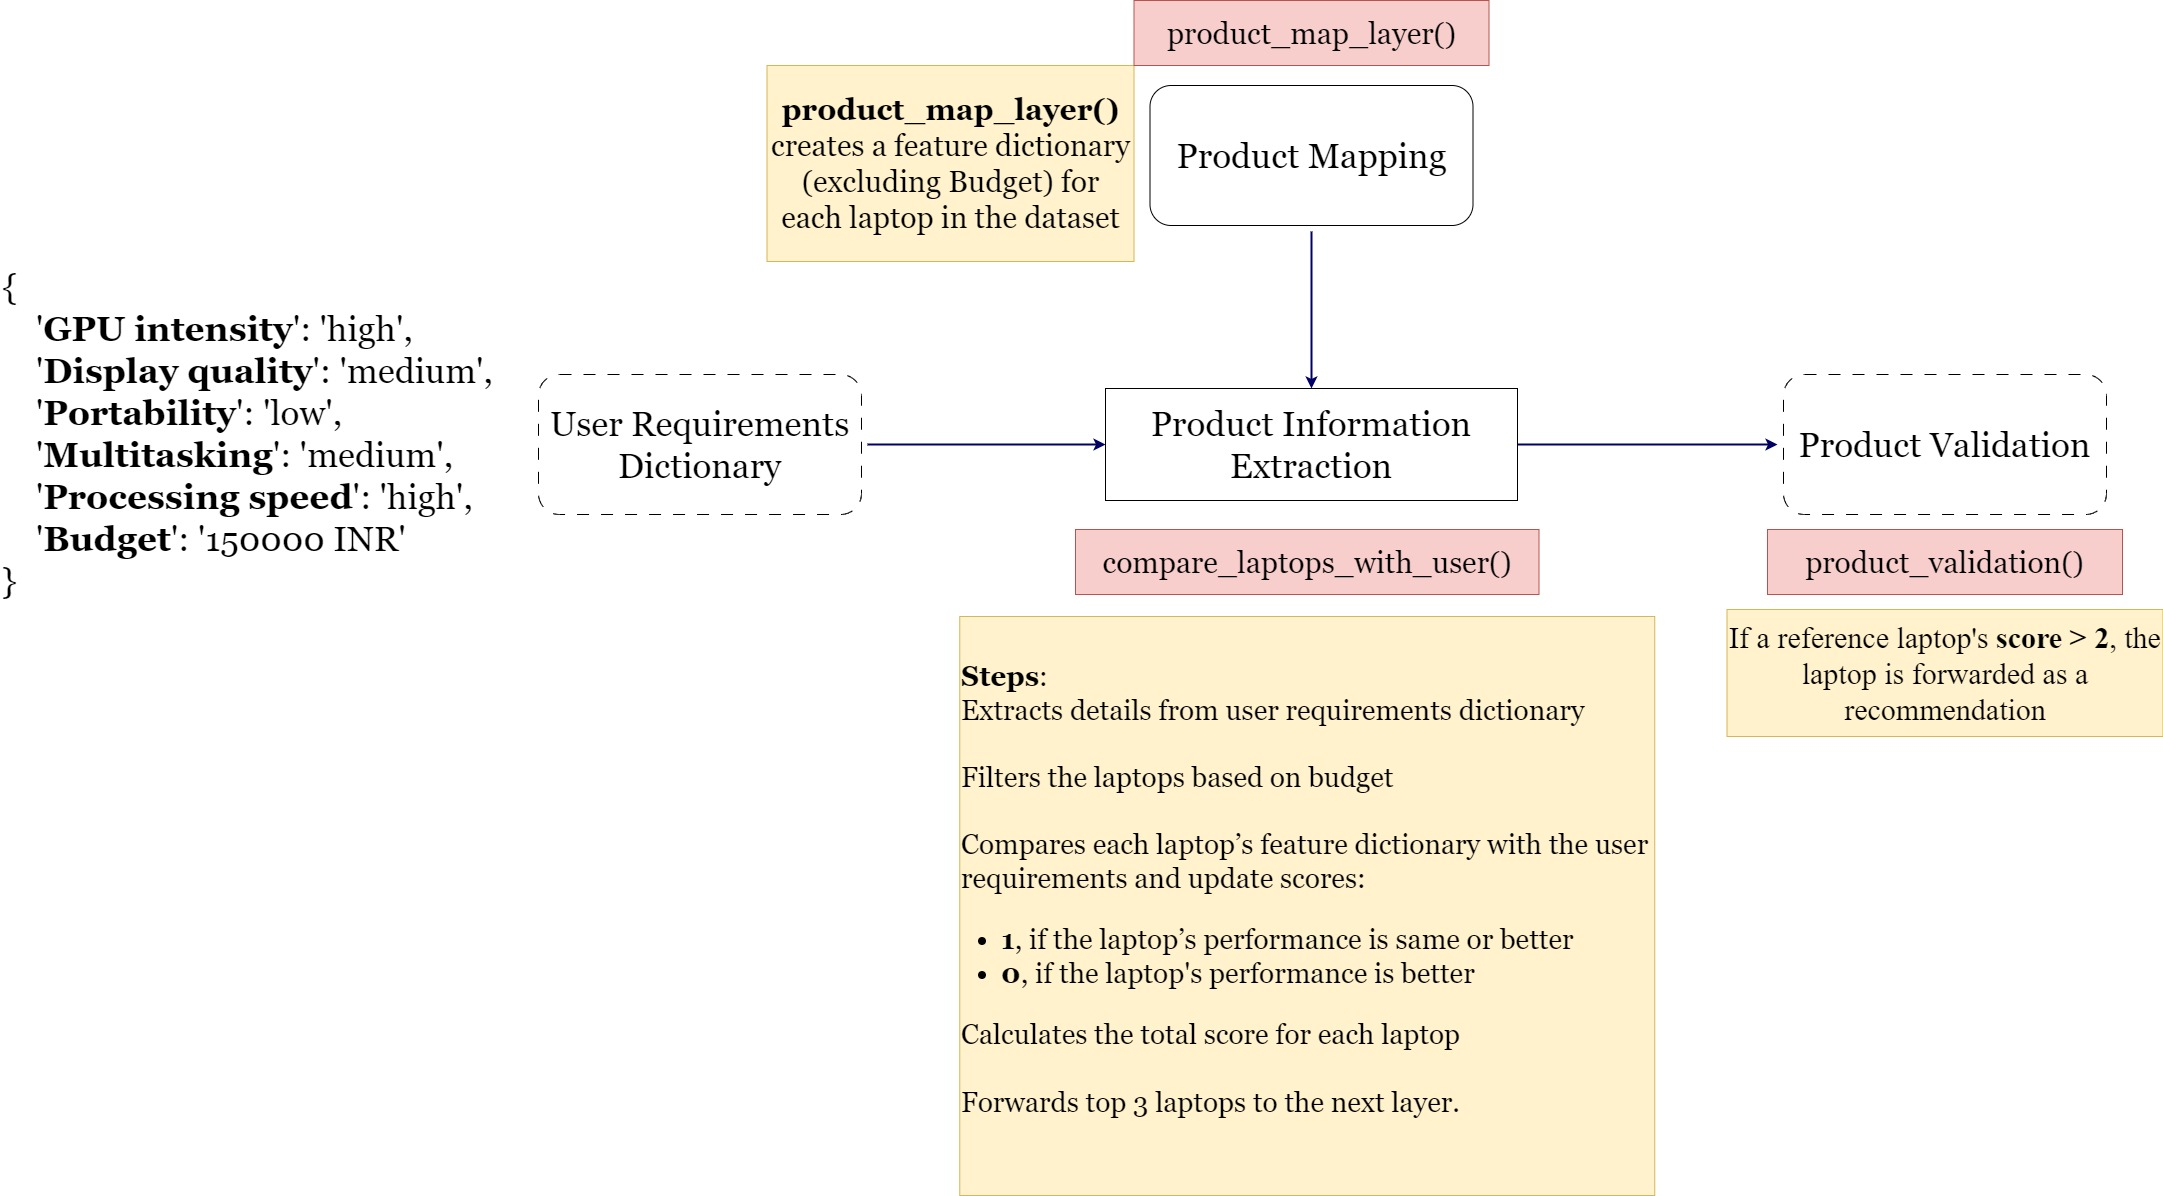

### 3.3 Implementing the Product Mapping and Information Extraction Layers

In this section, we take in the output of the previous layers, i.e. the user requirements, which is in the format of a Python dictionary.
<br>
Next we will extract the top 3 laptop recommendations based on user's requirements.

This stage consists of the following helper functions that will implement the information extraction and product matching layers.

### `product_map_layer()`:

This function is responsible for extracting key features and criteria from laptop descriptions. Here's a breakdown of how it works:

-  Use a prompt that assign it the role of a Laptop Specifications Classifier, whose objective is to extract key features and classify them based on laptop descriptions.

- Provide step-by-step instructions for extracting laptop features from description.

- Assign specific rules for each feature (e.g., GPU Intensity, Display Quality, Portability, Multitasking, Processing Speed) and associate them with the appropriate classification value (Low, Medium, or High).

- Includes Few Shot Prompting (sample conversation between the user and assistant) to demonstrate the expected result of the feature extraction and classification process.

In [48]:
def product_map_layer(laptop_description):
    delimiter = "#####"

    lap_spec = {
        "GPU intensity":"(Type of the Graphics Processor)",
        "Display quality":"(Display Type, Screen Resolution, Display Size)",
        "Portability":"(Laptop Weight)",
        "Multitasking":"(RAM Size)",
        "Processing speed":"(CPU Type, Core, Clock Speed)"
    }

    values = {'low','medium','high'}

    prompt=f"""
    You are a Laptop Specifications Classifier whose job is to extract the key features of laptops and classify them as per their requirements.
    To analyze each laptop, perform the following steps:
    Step 1: Extract the laptop's primary features from the description {laptop_description}
    Step 2: Store the extracted features in {lap_spec} \
    Step 3: Classify each of the items in {lap_spec} into {values} based on the following rules: \
    {delimiter}
    GPU Intensity:
    - low: <<< if GPU is entry-level such as an integrated graphics processor or entry-level dedicated graphics like Intel UHD >>> , \n
    - medium: <<< if mid-range dedicated graphics like M1, AMD Radeon, Intel Iris >>> , \n
    - high: <<< high-end dedicated graphics like Nvidia RTX >>> , \n

    Display Quality:
    - low: <<< if resolution is below Full HD (e.g., 1366x768). >>> , \n
    - medium: <<< if Full HD resolution (1920x1080) or higher. >>> , \n
    - high: <<< if High-resolution display (e.g., 4K, Retina) with excellent color accuracy and features like HDR support. >>> \n

    Portability:
    - high: <<< if laptop weight is less than 1.51 kg >>> , \n
    - medium: <<< if laptop weight is between 1.51 kg and 2.51 kg >>> , \n
    - low: <<< if laptop weight is greater than 2.51 kg >>> \n

    Multitasking:
    - low: <<< If RAM size is 8 GB, 12 GB >>> , \n
    - medium: <<< if RAM size is 16 GB >>> , \n
    - high: <<< if RAM size is 32 GB, 64 GB >>> \n

    Processing Speed:
    - low: <<< if entry-level processors like Intel Core i3, AMD Ryzen 3 >>> , \n
    - medium: <<< if Mid-range processors like Intel Core i5, AMD Ryzen 5 >>> , \n
    - high: <<< if High-performance processors like Intel Core i7, AMD Ryzen 7 or higher >>> \n
    {delimiter}

    {delimiter}
    Here is input output pair for few-shot learning:
    input 1: "The Dell Inspiron is a versatile laptop that combines powerful performance and affordability. It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing. With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity. The laptop sports a vibrant 15.6" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience. Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage. Additionally, it boasts an Intel UHD GPU for decent graphical performance and a backlit keyboard for enhanced typing convenience. With a one-year warranty and a battery life of up to 6 hours, the Dell Inspiron is a reliable companion for work or entertainment. All these features are packed at an affordable price of 35,000, making it an excellent choice for budget-conscious users."
    output 1: {{'GPU intensity': 'medium','Display quality':'medium','Portability':'medium','Multitasking':'high','Processing speed':'medium'}}

    {delimiter}
    ### Strictly don't keep any other text in the values of the JSON dictionary other than low or medium or high ###
    """
    input = f"""Follow the above instructions step-by-step and output the string {lap_spec} for the following laptop {laptop_description}."""
    #see that we are using the Completion endpoint and not the Chatcompletion endpoint
    messages=[{"role": "system", "content":prompt },{"role": "user","content":input}]

    response = get_chat_completions(messages)

    return response

Let's test this for one sample laptop description.

#### unit testing `product_map_layer()`

In [49]:
laptop_description_1 = f"""
The Dell Inspiron is a versatile laptop that combines powerful performance and affordability.
It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing.
With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity.
The laptop sports a vibrant 15.6" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience.
Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage.
Additionally, it boasts an Intel UHD GPU for decent graphical performance and a backlit keyboard for enhanced typing convenience.
With a one-year warranty and a battery life of up to 6 hours, the Dell Inspiron is a reliable companion for work or entertainment.
All these features are packed at an affordable price of 35,000, making it an excellent choice for budget-conscious users.
"""

In [50]:
display(product_map_layer(laptop_description_1))

"{'GPU intensity': 'low', 'Display quality': 'medium', 'Portability': 'medium', 'Multitasking': 'low', 'Processing speed': 'medium'}"

In [51]:
# # Data type of the output response
print(type(product_map_layer(laptop_description_1)))

<class 'str'>


Let's now apply this function to the entire laptop dataset

In [52]:
##Run this code once to extract product info in the form of a dictionary
laptop_df= pd.read_csv('laptop_data.csv')

## Create a new column "laptop_feature" that contains the dictionary of the product features
laptop_df['laptop_feature'] = laptop_df['Description'].apply(lambda x: product_map_layer(x))

In [53]:
# sample whats in laptop feature
print(laptop_df['Brand'][0])
print(laptop_df['laptop_feature'][0])
print(laptop_df['laptop_feature'][1])

Dell
{'GPU intensity': 'medium', 'Display quality': 'medium', 'Portability': 'medium', 'Multitasking': 'low', 'Processing speed': 'medium'}
{'GPU intensity': 'high', 'Display quality': 'medium', 'Portability': 'medium', 'Multitasking': 'medium', 'Processing speed': 'high'}


In [54]:
laptop_df.to_csv("updated_laptop_v2.csv",index=False,header = True)

### `compare_laptops_with_user()`:

This function compares the user's profile with the different laptops and come back with the top  recommendations. It will perform the following steps:
    - It will take the user requirements dictionary as input
    - Filter the laptops based on their price, keeping only the ones within the user's budget.
    - Calculate a score for each laptop based on how well it matches the user's requirements.
    - Sort the laptops based on their scores in descending order.
    - Return the top 3 laptops as a JSON-formatted string.

In [55]:
import pandas as pd  # Importing the pandas library for data manipulation
import json
def compare_laptops_with_user(user_requirements):
    """
    Compares user requirements against a dataset of laptops and returns the top
    matching laptops as a JSON string.

    This function reads a CSV file containing laptop data, processes the laptop
    descriptions to extract features, and filters laptops based on the user's
    budget. It then assigns a score to each laptop based on how well its features
    match the user's requirements. Laptops are scored higher when their feature
    values meet or exceed the user's specified values.

    Parameters:
    user_requirements (dict): A dictionary containing the user's laptop
    requirements, including 'GPU intensity', 'Display quality', 'Portability',
    'Multitasking', 'Processing speed', and 'Budget'.

    Returns:
    str: A JSON-formatted string containing the top 3 laptops that best match the
    user's requirements.
    """
    laptop_df = pd.read_csv('updated_laptop_v2.csv')

    # Extracting user requirements from the input string (assuming it's a dictionary)
    # Since the function parameter already seems to be a string, we'll use it directly instead of extracting from a dictionary

    # Extracting the budget value from user_requirements and converting it to an integer
    budget = int(user_requirements.get('Budget', '0')) #.replace(',', '').split()[0])
    # budget
    # # Creating a copy of the DataFrame and filtering laptops based on the budget
    filtered_laptops = laptop_df.copy()
    filtered_laptops['Price'] = filtered_laptops['Price'].str.replace(',', '').astype(int)
    filtered_laptops = filtered_laptops[filtered_laptops['Price'] <= budget].copy()
    # filtered_laptops
    # # # Mapping string values 'low', 'medium', 'high' to numerical scores 0, 1, 2
    mappings = {'low': 0, 'medium': 1, 'high': 2}

    # # # Creating a new column 'Score' in the filtered DataFrame and initializing it to 0
    filtered_laptops['Score'] = 0

    # # # Iterating over each laptop in the filtered DataFrame to calculate scores based on user requirements
    for index, row in filtered_laptops.iterrows():
        user_product_match_str = row['laptop_feature']
        #laptop_values = user_product_match_str
        laptop_values = get_chat_completions_with_function_calling(user_product_match_str, False)
        score = 0

    #     # Comparing user requirements with laptop features and updating scores
        for key, user_value in user_requirements.items():
            # if key.lower() == 'budget':
            if key == 'Budget':
                continue  # Skipping budget comparison
            laptop_value = laptop_values.get(key, None)
            # print(key, laptop_value)
            laptop_mapping = mappings.get(laptop_value, -1)
            user_mapping = mappings.get(user_value, -1)
            if laptop_mapping >= user_mapping:
                score += 1  # Incrementing score if laptop value meets or exceeds user value

        filtered_laptops.loc[index, 'Score'] = score  # Updating the 'Score' column in the DataFrame

    # Sorting laptops by score in descending order and selecting the top 3 products
    top_laptops = filtered_laptops.drop('laptop_feature', axis=1)
    top_laptops = top_laptops.sort_values('Score', ascending=False).head(3)
    top_laptops_json = top_laptops.to_json(orient='records')  # Converting the top laptops DataFrame to JSON format

    # top_laptops
    return top_laptops_json

Now that you have the `compare_laptops_with_user()` function ready, let's pass the `response_dict_n` to the function to get top 3 recommendation.

In [56]:
# Below is a test: consider response_dict_n as a sample user dictionary
display(response_dict_n, '\n',type(response_dict_n))

{'GPU intensity': 'high',
 'Display quality': 'high',
 'Portability': 'low',
 'Multitasking': 'high',
 'Processing speed': 'medium',
 'Budget': 50000}

'\n'

dict

In [57]:
top_3_laptops = compare_laptops_with_user(response_dict_n)

display(top_3_laptops)

'[{"Brand":"Dell","Model Name":"Inspiron","Core":"i5","CPU Manufacturer":"Intel","Clock Speed":"2.4 GHz","RAM Size":"8GB","Storage Type":"SSD","Display Type":"LCD","Display Size":"15.6\\"","Graphics Processor":"Intel UHD","Screen Resolution":"1920x1080","OS":"Windows 10","Laptop Weight":"2.5 kg","Special Features":"Backlit Keyboard","Warranty":"1 year","Average Battery Life":"6 hours","Price":35000,"Description":"The Dell Inspiron is a versatile laptop that combines powerful performance and affordability. It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing. With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity. The laptop sports a vibrant 15.6\\" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience. Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage. Additionally, it boasts an Intel UHD GPU for decent graphical performan

In [58]:
# Get output in JSON Format
top_3_laptops_json = json.loads(top_3_laptops)
# type(top_3_laptops_json)
top_3_laptops_json

[{'Brand': 'Dell',
  'Model Name': 'Inspiron',
  'Core': 'i5',
  'CPU Manufacturer': 'Intel',
  'Clock Speed': '2.4 GHz',
  'RAM Size': '8GB',
  'Storage Type': 'SSD',
  'Display Type': 'LCD',
  'Display Size': '15.6"',
  'Graphics Processor': 'Intel UHD',
  'Screen Resolution': '1920x1080',
  'OS': 'Windows 10',
  'Laptop Weight': '2.5 kg',
  'Special Features': 'Backlit Keyboard',
  'Warranty': '1 year',
  'Average Battery Life': '6 hours',
  'Price': 35000,
  'Description': 'The Dell Inspiron is a versatile laptop that combines powerful performance and affordability. It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing. With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity. The laptop sports a vibrant 15.6" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience. Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage. Additio

### `product_validation_layer()`:

This function verifies that the laptop recommendations are good enough, has score greater than 2, and matches the user's requirements.

In [59]:
def recommendation_validation(laptop_recommendation):
    """
    Validate the laptop recommendation by checking if the score of the laptop is greater than 2.

    Parameters:
    laptop_recommendation (str): A JSON-formatted string containing the laptop recommendation.

    Returns:
    list: A list of dictionaries containing the laptop information with a score greater than 2.
    """
    data = json.loads(laptop_recommendation)
    data1 = []
    for i in range(len(data)):
        if data[i]['Score'] > 2:
            data1.append(data[i])

    return data1

In [60]:
validated_data = recommendation_validation(top_3_laptops)
display(validated_data,'\n')

[]

'\n'

Now that you the top 3 laptops extracted, let's pass it to the recommendation layer that'll send it to the user and the user can ask questions around it.

## Stage 3

[Stage 3 Flowchart](https://cdn.upgrad.com/uploads/production/4c12bc73-8c12-4095-90f2-3dfca0f277e5/Stage+3.jpg)

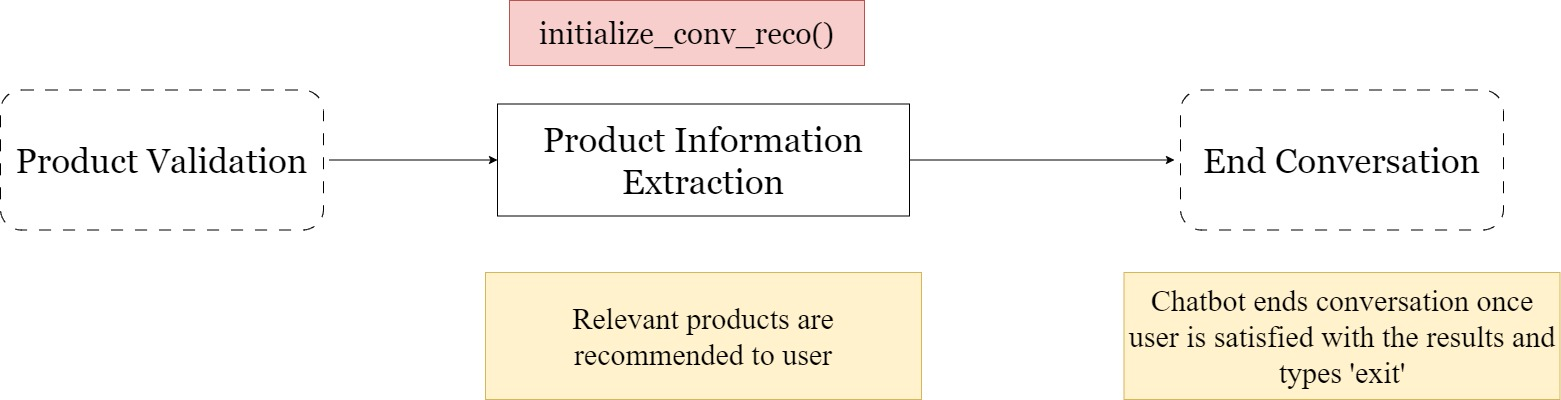

### 3.4: Product Recommendation Layer

Finally, we come to the product recommendation layer. It takes the output from the `compare_laptops_with_user` function in the previous layer and provides the recommendations to the user. It has the following steps.
1. Initialize the conversation for recommendation.
2. Generate the recommendations and display in a presentable format.
3. Ask questions basis the recommendations.



In [61]:
def initialize_conv_reco(products):
    system_message = f"""
    You are an intelligent laptop gadget expert and you are tasked with the objective to \
    solve the user queries about any product from the catalogue in the user message \
    You should keep the user profile in mind while answering the questions.\

    Start with a brief summary of each laptop in the following format, in decreasing order of price of laptops:
    1. <Laptop Name> : <Major specifications of the laptop>, <Price in Rs>
    2. <Laptop Name> : <Major specifications of the laptop>, <Price in Rs>

    """
    user_message = f""" These are the user's products: {products}"""
    conversation = [{"role": "system", "content": system_message },
                    {"role":"user","content":user_message}]
    # conversation_final = conversation[0]['content']
    return conversation

Let's initialize the conversation for recommendation.

In [62]:
debug_conversation_reco = initialize_conv_reco(top_3_laptops)
debug_conversation_reco

[{'role': 'system',
  'content': '\n    You are an intelligent laptop gadget expert and you are tasked with the objective to     solve the user queries about any product from the catalogue in the user message     You should keep the user profile in mind while answering the questions.\n    Start with a brief summary of each laptop in the following format, in decreasing order of price of laptops:\n    1. <Laptop Name> : <Major specifications of the laptop>, <Price in Rs>\n    2. <Laptop Name> : <Major specifications of the laptop>, <Price in Rs>\n\n    '},
 {'role': 'user',
  'content': ' These are the user\'s products: [{"Brand":"Dell","Model Name":"Inspiron","Core":"i5","CPU Manufacturer":"Intel","Clock Speed":"2.4 GHz","RAM Size":"8GB","Storage Type":"SSD","Display Type":"LCD","Display Size":"15.6\\"","Graphics Processor":"Intel UHD","Screen Resolution":"1920x1080","OS":"Windows 10","Laptop Weight":"2.5 kg","Special Features":"Backlit Keyboard","Warranty":"1 year","Average Battery Lif

Let's see what the assistant responds with the new initialization.

In [63]:
debug_recommendation = get_chat_completions(debug_conversation_reco)
print(debug_recommendation + '\n')

Here's a brief summary of the laptops in your product catalogue, arranged by price:

1. **Acer Swift 3**: AMD Ryzen 5 processor (2.3 GHz), 8GB RAM, 512GB SSD, 14" IPS display with 1920x1080 resolution, AMD Radeon graphics, Windows 11, 1.2 kg weight, fingerprint reader, 1 year warranty, 9 hours battery life, **Price: Rs 50,000**.

2. **Dell Inspiron**: Intel Core i5 processor (2.4 GHz), 8GB RAM, 256GB SSD, 15.6" LCD display with 1920x1080 resolution, Intel UHD graphics, Windows 10, 2.5 kg weight, backlit keyboard, 1 year warranty, 6 hours battery life, **Price: Rs 35,000**.

3. **HP Pavilion**: Intel Core i5 processor (2.3 GHz), 12GB RAM, 1TB HDD, 15.6" LCD display with 1366x768 resolution, Intel UHD graphics, Windows 10, 2.1 kg weight, B&O audio, 1 year warranty, 4 hours battery life, **Price: Rs 30,000**.

If you have any specific questions or need further details about any of these laptops, feel free to ask!



Now, you can converse with the chatbot on the filtered products.

You can repeat the process of appending the assistant and user messages and test the chatbot out.

## Combining all the 3 stages

In this layer, we combine all the three stages that we defined above.

`Stage 1` + `Stage 2` + `Stage 3`

### 3.5 Dialogue Management System

Bringing everything together, we create a `diagloue_mgmt_system()` function that contains the logic of how the different layers would interact with each other. This will be the function that we'll call to initiate the chatbot

In [69]:
def dialogue_mgmt_system():
    conversation = initialize_conversation()

    introduction = get_chat_completions(conversation)

    display(introduction + '\n')

    top_3_laptops = None

    user_input = ''

    while(user_input != "exit"):

        user_input = input("")

        moderation = moderation_check(user_input)
        if moderation == 'Flagged':
            display("Sorry, this message has been flagged. Please restart your conversation.")
            break

        if top_3_laptops is None:
            conversation.append({"role": "user", "content": user_input})
            response_assistant = get_chat_completions(conversation)
            moderation = moderation_check(response_assistant)
            if moderation == 'Flagged':
                display("Sorry, this message has been flagged. Please restart your conversation.")
                break

            confirmation = intent_confirmation_layer(response_assistant)

            print("Intent Confirmation Yes/No:",confirmation.get('result'))

            if "No" in confirmation.get('result'):
                conversation.append({"role": "assistant", "content": str(response_assistant)})
                print("\n" + str(response_assistant) + "\n")

            else:
                print("\n" + str(response_assistant) + "\n")
                print('\n' + "Variables extracted!" + '\n')

                response = get_user_requirements(response_assistant)
                result = get_chat_completions_with_function_calling(response, True)

                print("Thank you for providing all the information. Kindly wait, while I fetch the products: \n")
                top_3_laptops = compare_laptops_with_user(result)

                print("top 3 laptops are", top_3_laptops)

                validated_reco = recommendation_validation(top_3_laptops)

                conversation_reco = initialize_conv_reco(validated_reco)

                if (len(validated_reco) == 0):
                    print("Sorry that we do not have laptops that matches your requirements, restarting this conversation")
                    break

                conversation_reco.append({"role": "user", "content": "This is my user profile" + str(response)})

                recommendation = get_chat_completions(conversation_reco)

                moderation = moderation_check(recommendation)
                if moderation == 'Flagged':
                    display("Sorry, this message has been flagged. Please restart your conversation.")
                    break

                conversation_reco.append({"role": "assistant", "content": str(recommendation)})

                print(str(recommendation) + '\n')
        else:
            conversation_reco.append({"role": "user", "content": user_input})

            response_asst_reco = get_chat_completions(conversation_reco)

            moderation = moderation_check(response_asst_reco)
            if moderation == 'Flagged':
                print("Sorry, this message has been flagged. Please restart your conversation.")
                break

            print('\n' + response_asst_reco + '\n')
            conversation.append({"role": "assistant", "content": response_asst_reco})

In [70]:
dialogue_mgmt_system()

"Hello! I'm here to help you find the best laptop that suits your needs. Could you please share what you primarily plan to use the laptop for? Understanding your requirements will help me tailor my recommendations better.\n"

Hi, I want a gaming laptop
Intent Confirmation Yes/No: No

Great! Gaming laptops need to meet certain performance requirements. To help you find the best option, could you please share what kind of games you primarily play? Are they high-end games that require intense graphics, or are you more into casual gaming? Additionally, how important is screen quality and resolution for your gaming experience?

yes, i want good display quality as i play processor intensive games that has good GPU. I also do lot of multi tasking.
Intent Confirmation Yes/No: No

Thank you for sharing that information! It sounds like you need a laptop with high GPU intensity, high display quality, and strong multitasking capabilities. 

To further refine my understanding, could you let me know how portable you need the laptop to be? For instance, will you be taking it with you on trips often, or will it mainly stay in one place? Also, could you please share your budget for the laptop?

yes, i do take laptop on the 